# Data Transformation
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing


## Load Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer

df_imdb = pd.read_csv("04_imdb.csv", sep=",", index_col=0)

## recall what do we have

In [3]:
df_imdb.shape

(88, 12)

In [4]:
df_imdb.columns

Index(['color', 'director_name', 'duration', 'gross', 'genres', 'movie_title',
       'title_year', 'country', 'budget', 'imdb_score', 'actors',
       'movie_facebook_likes'],
      dtype='object')

In [5]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 88 non-null     object 
 1   director_name         88 non-null     object 
 2   duration              88 non-null     int64  
 3   gross                 88 non-null     float64
 4   genres                88 non-null     object 
 5   movie_title           88 non-null     object 
 6   title_year            88 non-null     int64  
 7   country               88 non-null     object 
 8   budget                88 non-null     float64
 9   imdb_score            88 non-null     float64
 10  actors                88 non-null     object 
 11  movie_facebook_likes  88 non-null     int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 8.9+ KB


## Categorical column

- `color`
- `director_name`
- `genres`
- `movie_title`
- `country`
- `actors`
- `title_year` *

### Column `color`

In [485]:
df_imdb.color.value_counts(dropna=False)

Color              87
Black and white     1
Name: color, dtype: int64

In [486]:
df_imdb.head(5)

,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf Of Wall Street,2013,United States,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,United States,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,United States,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,United States,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation Of Smaug,2013,United States,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [487]:
encoder = LabelEncoder()
encoded_color = encoder.fit_transform(df_imdb.color)
print(encoded_color)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [488]:
df_imdb.color = encoded_color
df_imdb.head(5)

,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,1,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf Of Wall Street,2013,United States,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,1,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,United States,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,1,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,United States,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,1,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,United States,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,1,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation Of Smaug,2013,United States,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


### Columna `director_name`

In [489]:
df_imdb.director_name.nunique()

60

In [490]:
# lets assume our target is imdb_score
# Mean_encoded_subject = df.groupby(['SubjectName'])['Target'].mean().to_dict()
mean_encoded = df_imdb.groupby(['director_name'])['imdb_score'].mean().to_dict()
mean_encoded

{'Adam McKay': 6.3,
 'Adam Shankman': 5.9,
 'Angelina Jolie Pitt': 7.2,
 'Anthony Russo': 7.8,
 'Baz Luhrmann': 7.3,
 'Bryan Singer': 7.65,
 'Christopher Nolan': 8.633333333333333,
 'Clint Eastwood': 6.9,
 'Darren Aronofsky': 5.8,
 'David Ayer': 7.6,
 'David Dobkin': 7.4,
 'David Fincher': 8.1,
 'Denis Villeneuve': 8.1,
 'Derek Cianfrance': 7.3,
 'Edward Hall': 7.2,
 'F. Gary Gray': 7.9,
 'Francis Lawrence': 7.6,
 'Gary Ross': 6.7,
 "Gavin O'Connor": 8.2,
 'Gnana Rajasekaran': 7.0,
 'Gore Verbinski': 6.5,
 'Guillaume Canet': 6.5,
 'James Mangold': 6.7,
 'James Wan': 7.2,
 'Jay Oliva': 8.4,
 'Joss Whedon': 8.1,
 'Justin Chadwick': 7.1,
 'Kathryn Bigelow': 7.4,
 'Kenneth Lonergan': 6.5,
 'Marc Webb': 6.85,
 'Martin Scorsese': 8.149999999999999,
 'Michael Bay': 6.466666666666666,
 'Michael Patrick King': 4.3,
 'Mike Leigh': 6.8,
 'No info': 6.972727272727273,
 'Oliver Stone': 6.5,
 'Paul Greengrass': 7.9,
 'Paul Thomas Anderson': 6.9,
 'Peter Jackson': 7.766666666666667,
 'Quentin Taranti

In [491]:
# df['SubjectName'] =  df['SubjectName'].map(Mean_encoded_subject)
df_imdb['director_name'] = df_imdb['director_name'].map(mean_encoded)
df_imdb.head(5)

,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
0,1,8.150000,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf Of Wall Street,2013,United States,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,1,7.200000,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,United States,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,1,8.200000,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,United States,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,1,6.500000,186,46495.0,Drama,Margaret,2011,United States,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,1,7.766667,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation Of Smaug,2013,United States,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


### Columna `genres`


In [492]:
df_imdb["genres"].value_counts(dropna=False)

Action|Adventure|Sci-Fi                     7
Drama                                       5
Crime|Drama|Thriller                        4
Biography|Drama|History                     4
Adventure|Fantasy                           3
Drama|Romance                               3
Crime|Drama|Mystery|Thriller                3
Action|Adventure|Thriller                   3
Action|Adventure|Fantasy                    2
Biography|Drama|Sport|War                   2
Action|Adventure|Fantasy|Sci-Fi             2
Action|Adventure|Sci-Fi|Thriller            2
Action|Adventure|Drama                      2
Adventure|Drama|History                     2
Crime|Drama                                 2
Adventure|Drama|Sci-Fi                      2
Drama|History|Thriller                      2
Adventure|Sci-Fi                            1
Comedy|Drama                                1
Action|Drama|War                            1
Action|Crime|Thriller                       1
Biography|Drama|Thriller          

In [493]:
df_imdb.genres.str.split("|").explode()

0     Biography
0        Comedy
0         Crime
0         Drama
1        Action
        ...    
97          War
98    Biography
98        Drama
98        Music
98      Musical
Name: genres, Length: 262, dtype: object

In [494]:
df_imdb.genres.str.split("|").explode().value_counts(dropna=False)

Drama        59
Adventure    33
Action       28
Thriller     27
Sci-Fi       19
Crime        16
Biography    15
History      13
Fantasy       9
War           7
Comedy        7
Romance       7
Mystery       6
Western       5
Musical       3
Music         3
Sport         3
Animation     1
Horror        1
Name: genres, dtype: int64

In [495]:
df_imdb.genres.str.split("|").explode().nunique()

19

In [496]:
df_imdb.genres.str.split("|").to_list()

[['Biography', 'Comedy', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Crime', 'Drama', 'Mystery', 'Thriller', 'Western'],
 ['Drama'],
 ['Adventure', 'Fantasy'],
 ['Adventure', 'Fantasy'],
 ['Drama', 'Romance'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Drama', 'Sci-Fi'],
 ['Crime', 'Drama', 'Mystery', 'Thriller'],
 ['Adventure', 'Drama', 'Sci-Fi'],
 ['Biography', 'Crime', 'Drama', 'History', 'Music'],
 ['Drama'],
 ['Drama', 'Western'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Thriller'],
 ['Adventure', 'Fantasy'],
 ['Drama', 'Musical', 'Romance'],
 ['Drama', 'History', 'Thriller'],
 ['Action', 'Adventure', 'Drama', 'History'],
 ['Adventure', 'Drama', 'Thriller', 'Western'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Crime', 'Drama', 'Mystery', 'Thriller'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Adventure', 'Drama', 'Sci-Fi'],
 ['Action', 'Adventure', 'Drama'],
 ['Biography', 'Drama', 'History', 'War'],
 ['Biography', 'Drama', 'History'

In [497]:
encoder = MultiLabelBinarizer()
encoder.fit_transform(df_imdb.genres.str.split("|").to_list())


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [498]:
df = pd.DataFrame(encoder.fit_transform(df_imdb.genres.str.split("|").to_list()),columns=encoder.classes_)
df.head(5)

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [499]:
df_imdb = df_imdb.reset_index(drop=True).join(df)
df_imdb.head(5)

,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,8.150000,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf Of Wall Street,2013,United States,100000000.0,8.2,...,0,0,0,0,0,0,0,0,0,0
1,1,7.200000,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,United States,200000000.0,7.2,...,0,0,0,0,0,1,0,0,0,0
2,1,8.200000,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,United States,44000000.0,7.9,...,0,0,0,1,0,0,0,1,0,1
3,1,6.500000,186,46495.0,Drama,Margaret,2011,United States,14000000.0,6.5,...,0,0,0,0,0,0,0,0,0,0
4,1,7.766667,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation Of Smaug,2013,United States,225000000.0,7.9,...,0,0,0,0,0,0,0,0,0,0


### Columna `movie_title`

In [500]:
df_imdb.movie_title.nunique()

86

In [7]:
df_imdb[df_imdb.movie_title.isin(['Ben-Hur','Unbroken'])]

,color,director_name,duration,gross,genres,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes
61,Color,Timur Bekmambetov,141,106160295.0,Adventure|Drama|History,Ben-Hur,2016,United States,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
62,Color,Timur Bekmambetov,141,106160295.0,Adventure|Drama|History,Ben-Hur,2016,United States,100000000.0,6.0,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
85,Color,Angelina Jolie Pitt,137,115603980.0,Biography|Drama|Sport|War,Unbroken,2014,United States,65000000.0,7.2,"Finn Wittrock,Jack O'Connell,Alex Russell",35000
86,Color,Angelina Jolie Pitt,137,115603980.0,Biography|Drama|Sport|War,Unbroken,2014,United States,65000000.0,7.2,"Finn Wittrock,Jack O'Connell,Alex Russell",35000


In [501]:
# either drop or take mean encoding

In [502]:
df_imdb.drop('movie_title', axis=1, inplace=True)

### Columna `title_year`

In [503]:
df_imdb.title_year.value_counts(dropna=False)

2014    21
2012    19
2013    17
2011    10
2015     8
2010     7
2016     6
Name: title_year, dtype: int64

In [504]:
df_imdb.title_year = df_imdb.title_year.astype(pd.CategoricalDtype(ordered=True))
df_imdb.title_year.dtypes

CategoricalDtype(categories=[2010, 2011, 2012, 2013, 2014, 2015, 2016], ordered=True)

In [505]:
df_imdb.title_year

0     2013
1     2013
2     2015
3     2011
4     2013
      ... 
83    2013
84    2010
85    2013
86    2014
87    2014
Name: title_year, Length: 88, dtype: category
Categories (7, int64): [2010 < 2011 < 2012 < 2013 < 2014 < 2015 < 2016]

### Columna `country`

In [506]:
df_imdb.country.nunique()

9

In [507]:
reshaped_country = np.array(df_imdb.country).reshape(len(df_imdb.country), 1)
reshaped_country

array([['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United Kingdom'],
       ['United States'],
       ['Germany'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['New Zealand'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['India'],
       ['United States'],
       ['United States'],
       ['United Kingdom'],
       ['United States'],
       ['United Kingdom'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United States'],
       ['United Kingdom'],
       ['United States'],
       ['United States'],
       ['United States']

In [508]:
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(reshaped_country)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0.

In [509]:
df = pd.DataFrame(encoder.fit_transform(reshaped_country),columns=list(encoder.categories_))
df.head(5)

,Australia,Canada,France,Germany,India,Kyrgyzstan,New Zealand,United Kingdom,United States
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [510]:
df.columns

MultiIndex([(     'Australia',),
            (        'Canada',),
            (        'France',),
            (       'Germany',),
            (         'India',),
            (    'Kyrgyzstan',),
            (   'New Zealand',),
            ('United Kingdom',),
            ( 'United States',)],
           )

In [511]:
df.columns = [multi_col[0] for multi_col in df.columns]
df_imdb = df_imdb.join(df)
df_imdb.head(5)

,color,director_name,duration,gross,genres,title_year,country,budget,imdb_score,actors,...,Western,Australia,Canada,France,Germany,India,Kyrgyzstan,New Zealand,United Kingdom,United States
0,1,8.150000,240,116866727.0,Biography|Comedy|Crime|Drama,2013,United States,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,7.200000,195,408992272.0,Action|Adventure|Sci-Fi,2013,United States,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,8.200000,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,2015,United States,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,6.500000,186,46495.0,Drama,2011,United States,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,7.766667,186,258355354.0,Adventure|Fantasy,2013,United States,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Columna `actors`

In [512]:
df_imdb.actors.value_counts(dropna=False)

Aidan Turner,Adam Brown,James Nesbitt                3
Morgan Freeman,Ayelet Zurer,Moises Arias             2
Finn Wittrock,Jack O'Connell,Alex Russell            2
Leonardo DiCaprio,Matthew McConaughey,Jon Favreau    1
Robert Downey Jr.,Robert Duvall,Leighton Meester     1
                                                    ..
Johnny Depp,Ruth Wilson,Tom Wilkinson                1
Lesley Manville,Ruth Sheen,Karl Johnson              1
Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill       1
Christian Bale,María Valverde,Ben Mendelsohn         1
Johnny Cannizzaro,Steve Schirripa,Scott Vance        1
Name: actors, Length: 84, dtype: int64

In [513]:
df_imdb.actors.str.split(",").explode().value_counts()

Leonardo DiCaprio      7
Jennifer Lawrence      6
Robert Downey Jr.      4
Hugh Jackman           4
Tom Hardy              4
                      ..
Martin Dew             1
Katherine Waterston    1
Serena Scott Thomas    1
Stephanie Sigman       1
Scott Vance            1
Name: actors, Length: 199, dtype: int64

In [514]:
df_imdb.actors.str.split(",").explode().nunique()

199

In [515]:
# 2 steps
# break into actor 1 actor 2 etc
df = df_imdb["actors"].str.split(",", n=3, expand=True)
df.head(5)

,0,1,2
0,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Aidan Turner,Adam Brown,James Nesbitt


In [516]:
df_imdb["actor_1"] = df[0]
df_imdb["actor_2"] = df[1]
df_imdb["actor_3"] = df[2]
df_imdb.head(5)

,color,director_name,duration,gross,genres,title_year,country,budget,imdb_score,actors,...,France,Germany,India,Kyrgyzstan,New Zealand,United Kingdom,United States,actor_1,actor_2,actor_3
0,1,8.150000,240,116866727.0,Biography|Comedy|Crime|Drama,2013,United States,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,1,7.200000,195,408992272.0,Action|Adventure|Sci-Fi,2013,United States,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,1,8.200000,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,2015,United States,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,1,6.500000,186,46495.0,Drama,2011,United States,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,1,7.766667,186,258355354.0,Adventure|Fantasy,2013,United States,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Aidan Turner,Adam Brown,James Nesbitt


In [517]:
# index actors
encoder = LabelEncoder()
encoder.fit(df_imdb.actors.str.split(",").explode().unique())

LabelEncoder()

In [518]:
encoder.transform(df_imdb.actor_1)

array([114, 157,  42, 131,   1,   1, 161,  35, 189, 159, 132,   4,  54,
       114,  23, 190,   1,  74,  83, 126, 114,  64,  74, 125,  56, 131,
        39,  98, 115,  96, 148,  85, 134, 114, 129,  40, 157,  37,  56,
        85,  86, 188, 139, 137,  85,  69,  73,   3, 114, 156, 189,  56,
        85, 142, 142, 186,  44, 157,  78,  81, 164, 190, 132, 187,  24,
        85,  45,  10, 114, 135,  74, 114, 111,  85,  59,  59, 117, 167,
        96,  79,  62,  52,  87, 153, 126, 189,  24,  95])

In [519]:
df_imdb.actor_1 = encoder.transform(df_imdb.actor_1)
df_imdb.actor_2 = encoder.transform(df_imdb.actor_2)
df_imdb.actor_3 = encoder.transform(df_imdb.actor_3)
df_imdb.head()

,color,director_name,duration,gross,genres,title_year,country,budget,imdb_score,actors,...,France,Germany,India,Kyrgyzstan,New Zealand,United Kingdom,United States,actor_1,actor_2,actor_3
0,1,8.150000,240,116866727.0,Biography|Comedy|Crime|Drama,2013,United States,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,114,132,97
1,1,7.200000,195,408992272.0,Action|Adventure|Sci-Fi,2013,United States,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,157,97,46
2,1,8.200000,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,2015,United States,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42,84,198
3,1,6.500000,186,46495.0,Drama,2011,United States,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,131,109,94
4,1,7.766667,186,258355354.0,Adventure|Fantasy,2013,United States,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,80


In [520]:
# can also use mean here
# get the mean score of each actor
# average score of 3 actor of each movie

# Standarize or Normalize
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [521]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

df_imdb.drop(columns=['genres', 'country', 'actors'], inplace=True)

<AxesSubplot:>

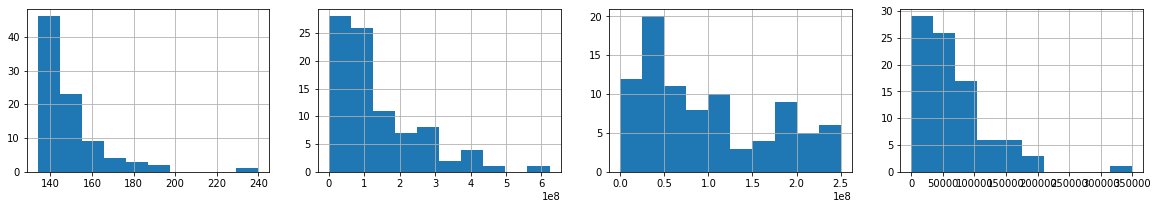

In [524]:
fig, axes = plt.subplots(nrows=1, ncols=4)

df_imdb.duration.hist(ax=axes[0])
df_imdb.gross.hist(ax=axes[1])
df_imdb.budget.hist(ax=axes[2])
df_imdb.movie_facebook_likes.hist(ax=axes[3])

In [527]:
scaler = StandardScaler()
standardized = scaler.fit_transform(df_imdb)
standard_df = pd.DataFrame(standardized, columns=df_imdb.columns)
standard_df

,color,director_name,duration,gross,title_year,budget,imdb_score,movie_facebook_likes,Action,Adventure,...,France,Germany,India,Kyrgyzstan,New Zealand,United Kingdom,United States,actor_1,actor_2,actor_3
0,0.107211,1.294066,5.531151,-0.180936,0.035244,-0.013983,1.109742,1.292036,-0.68313,-0.774597,...,-0.152499,-0.107211,-0.107211,-0.107211,-0.107211,-0.270501,0.434959,0.285016,0.602753,-0.009528
1,0.107211,0.061903,2.790834,2.188167,0.035244,1.341980,0.050552,0.541659,1.46385,1.290994,...,-0.152499,-0.107211,-0.107211,-0.107211,-0.107211,-0.270501,0.434959,1.115271,0.025490,-0.882222
2,0.107211,1.358917,2.303666,-0.689835,1.275819,-0.773323,0.791985,0.873221,-0.68313,-0.774597,...,-0.152499,-0.107211,-0.107211,-0.107211,-0.107211,-0.270501,0.434959,-1.105178,-0.188922,1.718748
3,0.107211,-0.846007,2.242770,-1.128334,-1.205332,-1.180112,-0.690881,-1.116152,-0.68313,-0.774597,...,-0.152499,-0.107211,-0.107211,-0.107211,-0.107211,-0.270501,0.434959,0.613257,0.223408,-0.060863
4,0.107211,0.796877,2.242770,0.966520,0.035244,1.680971,0.791985,0.332251,-0.68313,1.290994,...,-0.152499,-0.107211,-0.107211,-0.107211,-0.107211,-0.270501,0.434959,-1.896817,-1.574354,-0.300426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.107211,1.229215,-0.923819,-0.669142,0.035244,-1.098754,1.003823,0.332251,-0.68313,-0.774597,...,-0.152499,-0.107211,-0.107211,-0.107211,-0.107211,-0.270501,0.434959,1.038038,1.196509,1.496297
84,0.107211,0.191604,-0.923819,-1.067876,-1.825619,0.027825,0.156471,-1.116152,-0.68313,-0.774597,...,-0.152499,-0.107211,-0.107211,-0.107211,-0.107211,-0.270501,-2.299068,0.516715,-1.359942,0.880278
85,0.107211,0.969813,-0.923819,-0.260136,0.035244,-0.624167,0.791985,0.018140,-0.68313,-0.774597,...,-0.152499,-0.107211,-0.107211,-0.107211,-0.107211,-0.270501,0.434959,1.733135,-0.980597,0.606491
86,0.107211,0.580708,-0.923819,-0.433637,0.655531,-0.447892,0.474228,0.314801,1.46385,-0.774597,...,-0.152499,-0.107211,-0.107211,-0.107211,-0.107211,-0.270501,0.434959,-1.452727,0.421327,-0.129310


<AxesSubplot:>

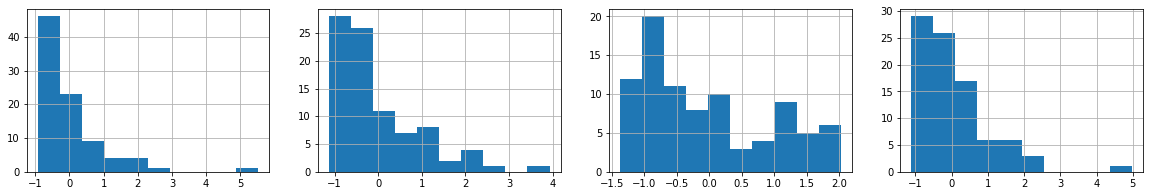

In [528]:
fig, axes = plt.subplots(nrows=1, ncols=4)
standard_df.duration.hist(ax=axes[0])
standard_df.gross.hist(ax=axes[1])
standard_df.budget.hist(ax=axes[2])
standard_df.movie_facebook_likes.hist(ax=axes[3])

In [529]:
scaler = MinMaxScaler()
minmax = scaler.fit_transform(df_imdb)
minmax_df = pd.DataFrame(minmax, columns=df_imdb.columns)
minmax_df

,color,director_name,duration,gross,title_year,budget,imdb_score,movie_facebook_likes,Action,Adventure,...,France,Germany,India,Kyrgyzstan,New Zealand,United Kingdom,United States,actor_1,actor_2,actor_3
0,1.0,0.875000,1.000000,0.187449,0.500000,0.399958,0.896552,0.395415,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.597884,0.670051,0.476684
1,1.0,0.659091,0.575472,0.656171,0.500000,0.799986,0.724138,0.272206,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.825397,0.492386,0.212435
2,1.0,0.886364,0.500000,0.086765,0.833333,0.175943,0.844828,0.326648,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.216931,0.426396,1.000000
3,1.0,0.500000,0.490566,0.000008,0.166667,0.055934,0.603448,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.687831,0.553299,0.461140
4,1.0,0.787879,0.490566,0.414471,0.500000,0.899993,0.844828,0.237822,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.388601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.0,0.863636,0.000000,0.090859,0.500000,0.079936,0.879310,0.237822,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.804233,0.852792,0.932642
84,1.0,0.681818,0.000000,0.011970,0.000000,0.412293,0.741379,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.661376,0.065990,0.746114
85,1.0,0.818182,0.000000,0.171780,0.500000,0.219946,0.844828,0.186246,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.994709,0.182741,0.663212
86,1.0,0.750000,0.000000,0.137453,0.666667,0.271949,0.793103,0.234957,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.121693,0.614213,0.440415


<AxesSubplot:>

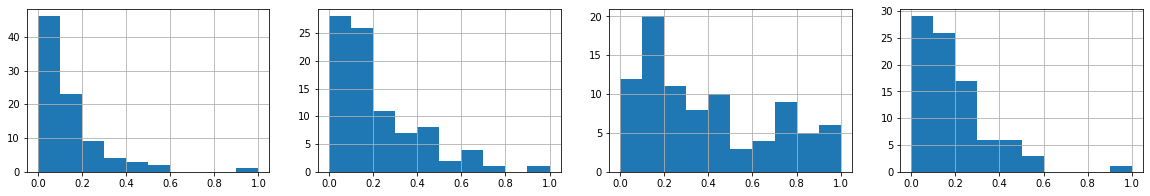

In [530]:
fig, axes = plt.subplots(nrows=1, ncols=4)
minmax_df.duration.hist(ax=axes[0])
minmax_df.gross.hist(ax=axes[1])
minmax_df.budget.hist(ax=axes[2])
minmax_df.movie_facebook_likes.hist(ax=axes[3])

In [531]:
scaler = Normalizer()
normalized = scaler.fit_transform(df_imdb)
normalize_df = pd.DataFrame(normalized, columns=df_imdb.columns)
normalize_df

,color,director_name,duration,gross,title_year,budget,imdb_score,movie_facebook_likes,Action,Adventure,...,France,Germany,India,Kyrgyzstan,New Zealand,United Kingdom,United States,actor_1,actor_2,actor_3
0,6.501482e-09,5.298708e-08,1.560356e-06,0.759807,0.000013,0.650148,5.331215e-08,0.000897,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,6.501482e-09,7.411689e-07,8.581956e-07,6.306437e-07
1,2.196478e-09,1.581464e-08,4.283132e-07,0.898343,0.000004,0.439296,1.581464e-08,0.000209,2.196478e-09,2.196478e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,2.196478e-09,3.448471e-07,2.130584e-07,1.010380e-07
2,1.433764e-08,1.175686e-07,2.681138e-06,0.775898,0.000029,0.630856,1.132673e-07,0.001634,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.433764e-08,6.021807e-07,1.204361e-06,2.838852e-06
3,7.142818e-08,4.642831e-07,1.328564e-05,0.003321,0.000144,0.999994,4.642831e-07,0.000000,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,7.142818e-08,9.357091e-06,7.785671e-06,6.714249e-06
4,2.918884e-09,2.267000e-08,5.429124e-07,0.754109,0.000006,0.656749,2.305918e-08,0.000242,0.000000e+00,2.918884e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,2.918884e-09,2.918884e-09,0.000000e+00,2.335107e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1.664068e-08,1.347895e-07,2.229851e-06,0.942992,0.000033,0.332814,1.347895e-07,0.001381,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.664068e-08,2.546023e-06,2.795634e-06,3.078525e-06
84,9.675304e-09,7.062972e-08,1.296491e-06,0.072578,0.000019,0.997363,7.062972e-08,0.000000,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.219088e-06,1.257790e-07,1.441620e-06
85,8.305809e-09,6.561589e-08,1.112978e-06,0.889559,0.000017,0.456819,6.561589e-08,0.000540,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,8.305809e-09,1.569798e-06,2.990091e-07,1.104673e-06
86,9.140250e-09,6.946590e-08,1.224793e-06,0.783384,0.000018,0.621537,6.946590e-08,0.000750,9.140250e-09,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,9.140250e-09,2.193660e-07,1.105970e-06,8.226225e-07


<AxesSubplot:>

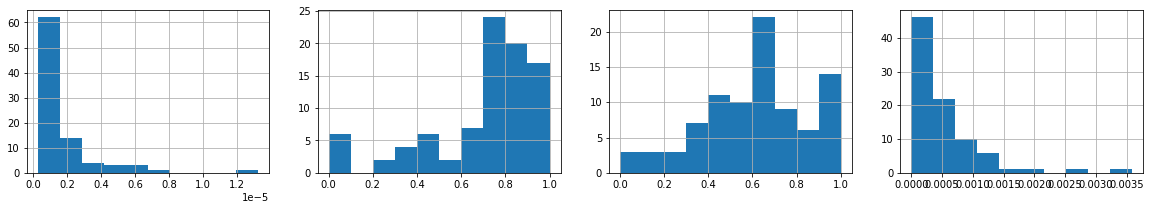

In [532]:
fig, axes = plt.subplots(nrows=1, ncols=4)
normalize_df.duration.hist(ax=axes[0])
normalize_df.gross.hist(ax=axes[1])
normalize_df.budget.hist(ax=axes[2])
normalize_df.movie_facebook_likes.hist(ax=axes[3])